# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Get rid of warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [34]:
# Check if there are null/na values to deal with
filename = "rotk_playable.csv"

pd_dataset = pd.read_csv(filename)
print("General Data Check:")
print(pd_dataset.head())
print("Number of Rows:", len(pd_dataset))

General Data Check:
           Name Kingdom  Age at Death  LEA  STR  INT  POL  CHA
0  Bao Sanniang     Shu            50   75   85   49   46   74
1     Cai Wenji     Wei            81   21   16   78   80   85
2       Cao Cao     Wei            65   99   73   93   97   96
3        Cao Pi     Wei            39   70   71   81   85   73
4       Cao Ren     Wei            55   92   86   59   51   76
Number of Rows: 93


In [35]:
print(pd_dataset.loc[pd_dataset["Name"] == "Wang Yi"])

       Name Kingdom  Age at Death  LEA  STR  INT  POL  CHA
56  Wang Yi     Wei            58   70   59   82   70   71


In [36]:
print(pd_dataset[["Age at Death", "LEA", "STR", "INT", "POL", "CHA"]].describe())

       Age at Death        LEA         STR         INT        POL        CHA
count      93.00000  93.000000   93.000000   93.000000  93.000000  93.000000
mean       51.55914  74.139785   70.000000   69.860215  62.526882  72.182796
std        14.20920  20.800602   24.499335   19.467694  21.411390  16.265425
min        15.00000   3.000000    5.000000    9.000000   4.000000  32.000000
25%        42.00000  73.000000   53.000000   56.000000  48.000000  62.000000
50%        53.00000  80.000000   79.000000   72.000000  65.000000  74.000000
75%        62.00000  88.000000   90.000000   85.000000  80.000000  83.000000
max        81.00000  99.000000  100.000000  100.000000  99.000000  99.000000


In [37]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

pd_dataset_stats_only = pd_dataset[["LEA", "STR", "INT", "POL", "CHA"]]

n_comp = 2
pca = PCA(n_components=n_comp)
pd_pca = pca.fit_transform(pd_dataset_stats_only)

# Approximate explained variance ratio    
print(f"PCA with {n_comp} components variance:", pca.explained_variance_ratio_.sum())        

# Compute pairwise distances before and after projection
orig_dist = euclidean_distances(pd_dataset_stats_only)
proj_dist = euclidean_distances(pd_pca)

# Compare distance matrices
correlation = np.corrcoef(orig_dist.ravel(), proj_dist.ravel())[0, 1]
print(f"Correlation between original and projected distances: {correlation:.8f}")

pd_pca = pd.DataFrame(pd_pca, columns=list(['PCA_0', 'PCA_1']))
print(pd_pca.head())

PCA with 2 components variance: 0.8636625778611111
Correlation between original and projected distances: 0.97818267
       PCA_0      PCA_1
0  26.553366  -8.248479
1 -64.459986 -45.168468
2 -26.078447  46.044529
3 -17.277498  11.782423
4  24.392667  10.028601


In [38]:
pd_2 = pd.concat((pd_dataset[["Name", "Age at Death", "Kingdom"]], pd_pca), axis=1)

print(pd_2.head())

           Name  Age at Death Kingdom      PCA_0      PCA_1
0  Bao Sanniang            50     Shu  26.553366  -8.248479
1     Cai Wenji            81     Wei -64.459986 -45.168468
2       Cao Cao            65     Wei -26.078447  46.044529
3        Cao Pi            39     Wei -17.277498  11.782423
4       Cao Ren            55     Wei  24.392667  10.028601


In [39]:
plt.rcParams["figure.figsize"] = (25,20)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:763: FutureWarning: Calling float on a 

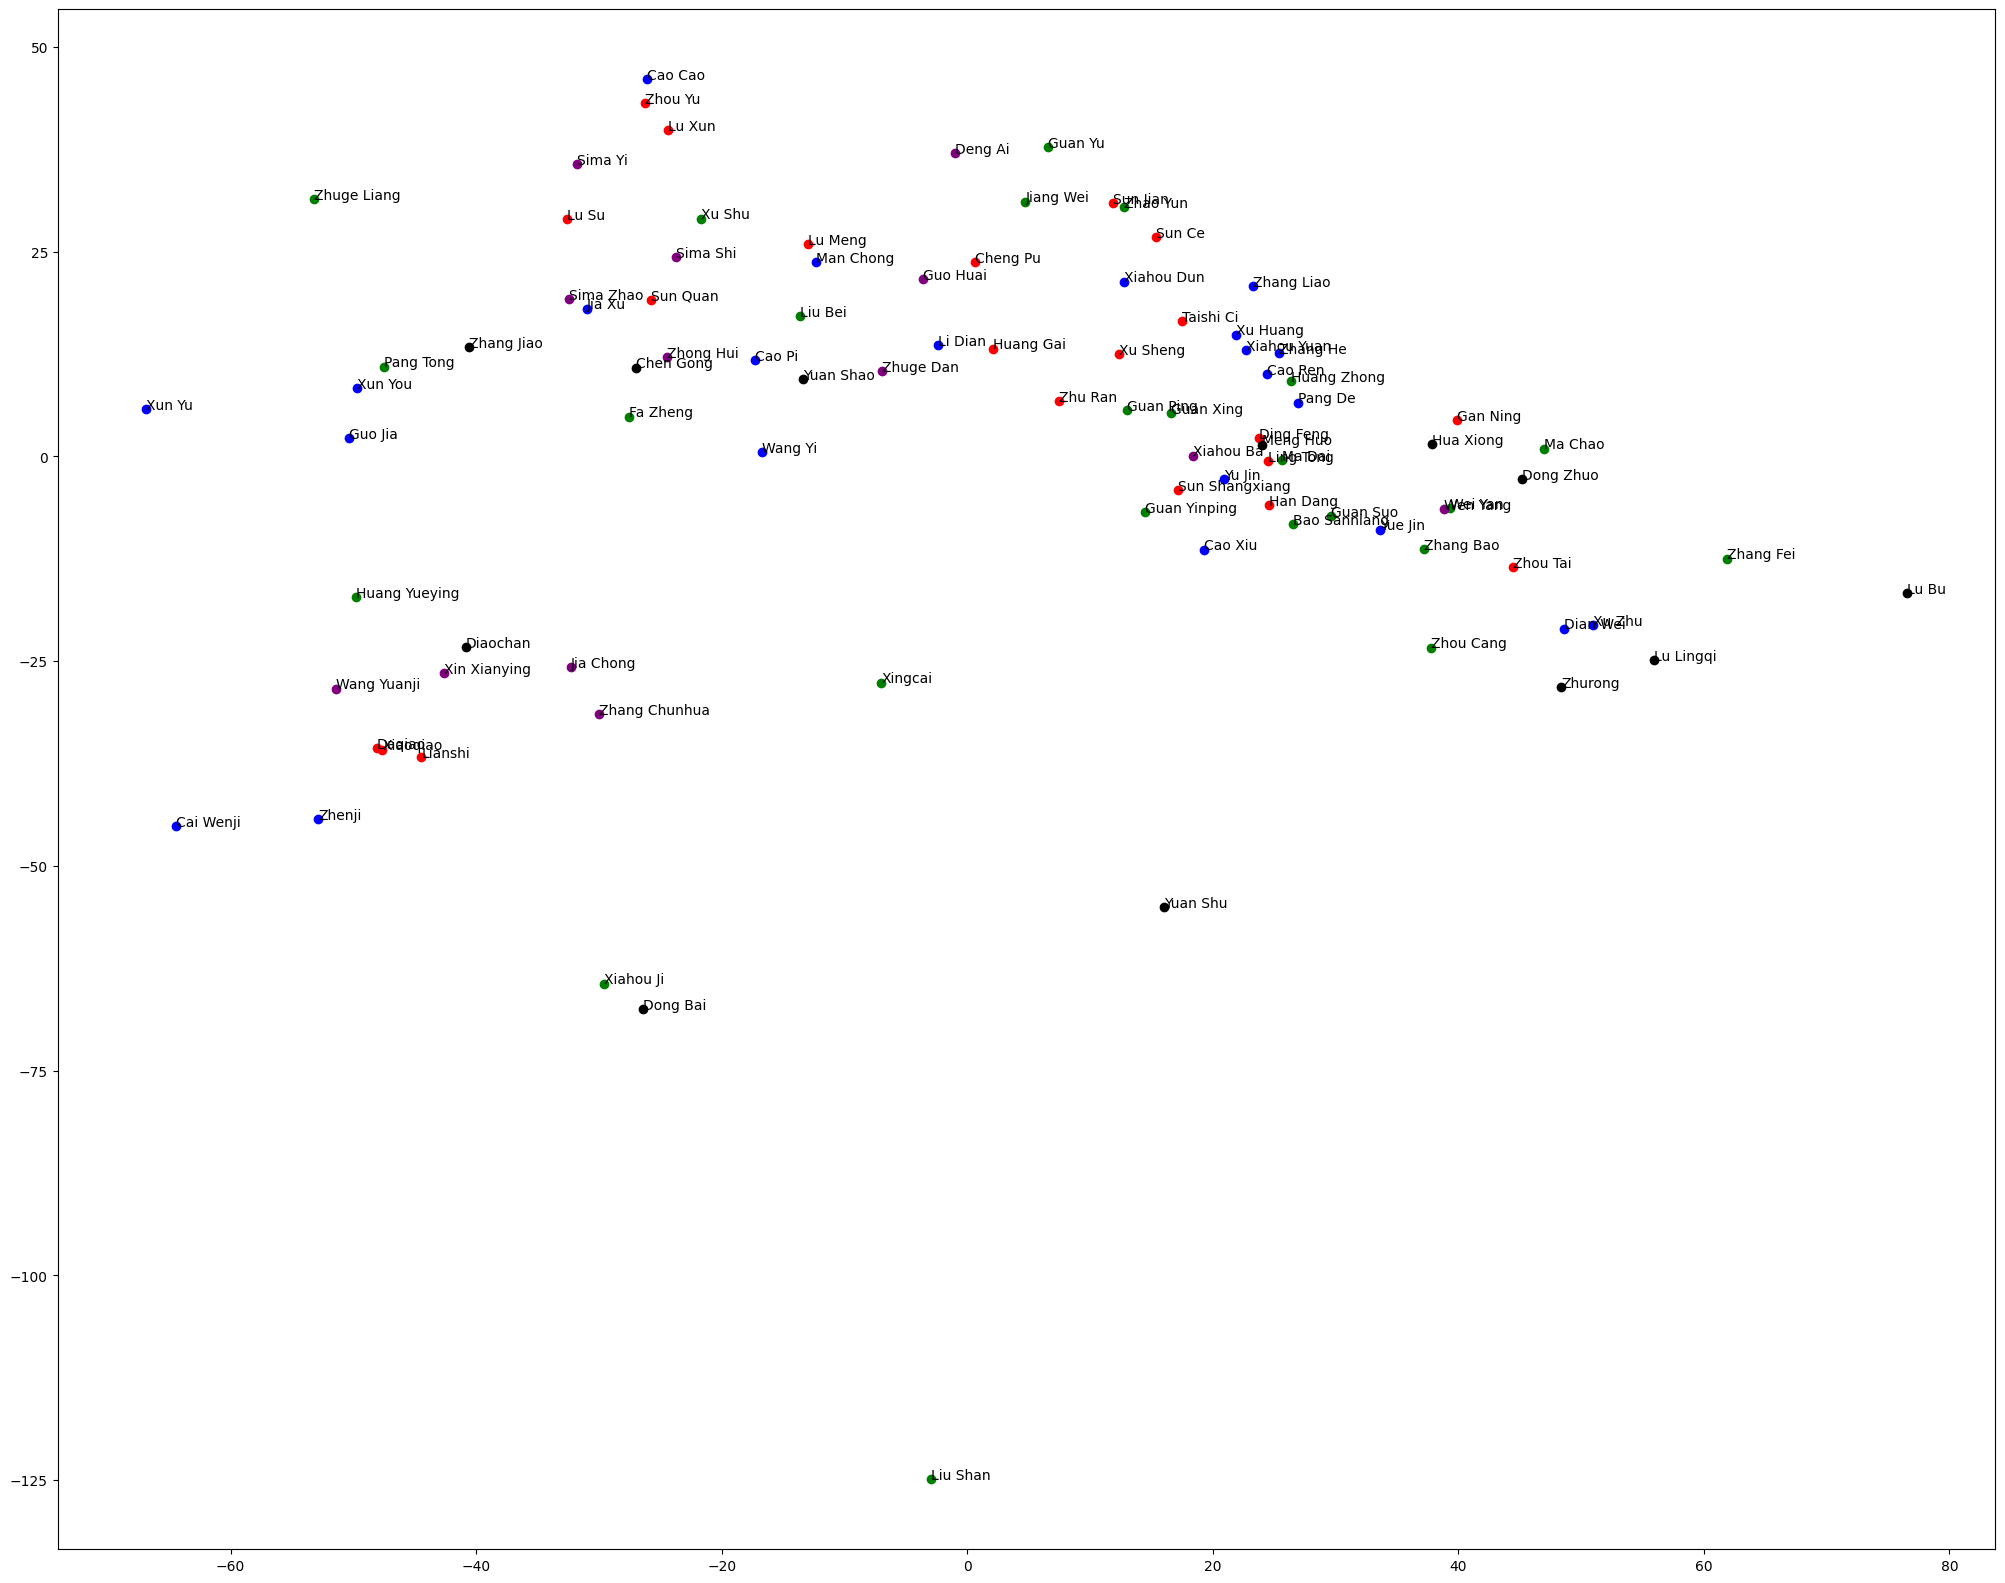

In [40]:
from matplotlib import pyplot as plt

plt.scatter(pd_2.loc[pd_2["Kingdom"] == "Shu"]["PCA_0"], pd_2[pd_2["Kingdom"] == "Shu"]["PCA_1"], c="green")
plt.scatter(pd_2.loc[pd_2["Kingdom"] == "Wu"]["PCA_0"], pd_2[pd_2["Kingdom"] == "Wu"]["PCA_1"], c="red")
plt.scatter(pd_2.loc[pd_2["Kingdom"] == "Wei"]["PCA_0"], pd_2[pd_2["Kingdom"] == "Wei"]["PCA_1"], c="blue")
plt.scatter(pd_2.loc[pd_2["Kingdom"] == "Jin"]["PCA_0"], pd_2[pd_2["Kingdom"] == "Jin"]["PCA_1"], c="purple")
plt.scatter(pd_2.loc[pd_2["Kingdom"] == "Other"]["PCA_0"], pd_2[pd_2["Kingdom"] == "Other"]["PCA_1"], c="black")

for i in range(len(pd_2)):
    name = pd_2.iloc[i]["Name"]
    plt.annotate(name, (pd_2.loc[pd_2["Name"] == name]["PCA_0"], pd_2.loc[pd_2["Name"] == name]["PCA_1"]))

plt.show()

In [41]:
pd_dataset_stats_only_no_cha = pd_dataset[["LEA", "STR", "INT", "POL"]]

n_comp = 2
pca_no_cha = PCA(n_components=n_comp)
pd_pca_no_cha = pca_no_cha.fit_transform(pd_dataset_stats_only_no_cha)

# Approximate explained variance ratio    
print(f"PCA with {n_comp} components variance:", pca_no_cha.explained_variance_ratio_.sum())        

# Compute pairwise distances before and after projection
orig_dist = euclidean_distances(pd_dataset_stats_only_no_cha)
proj_dist = euclidean_distances(pd_pca_no_cha)

# Compare distance matrices
correlation = np.corrcoef(orig_dist.ravel(), proj_dist.ravel())[0, 1]
print(f"Correlation between original and projected distances: {correlation:.8f}")

pd_pca_no_cha = pd.DataFrame(pd_pca_no_cha, columns=list(['PCA_0', 'PCA_1']))
print(pd_pca_no_cha.head())

PCA with 2 components variance: 0.9348180136707522
Correlation between original and projected distances: 0.99331132
       PCA_0      PCA_1
0  27.185974 -13.092866
1 -67.373228 -38.726276
2 -15.812953  45.163564
3 -16.327582  14.320978
4  27.201139   5.436929


In [42]:
pd_3 = pd.concat((pd_dataset[["Name", "Age at Death", "Kingdom"]], pd_pca_no_cha), axis=1)

print(pd_3.head())

           Name  Age at Death Kingdom      PCA_0      PCA_1
0  Bao Sanniang            50     Shu  27.185974 -13.092866
1     Cai Wenji            81     Wei -67.373228 -38.726276
2       Cao Cao            65     Wei -15.812953  45.163564
3        Cao Pi            39     Wei -16.327582  14.320978
4       Cao Ren            55     Wei  27.201139   5.436929


/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:763: FutureWarning: Calling float on a 

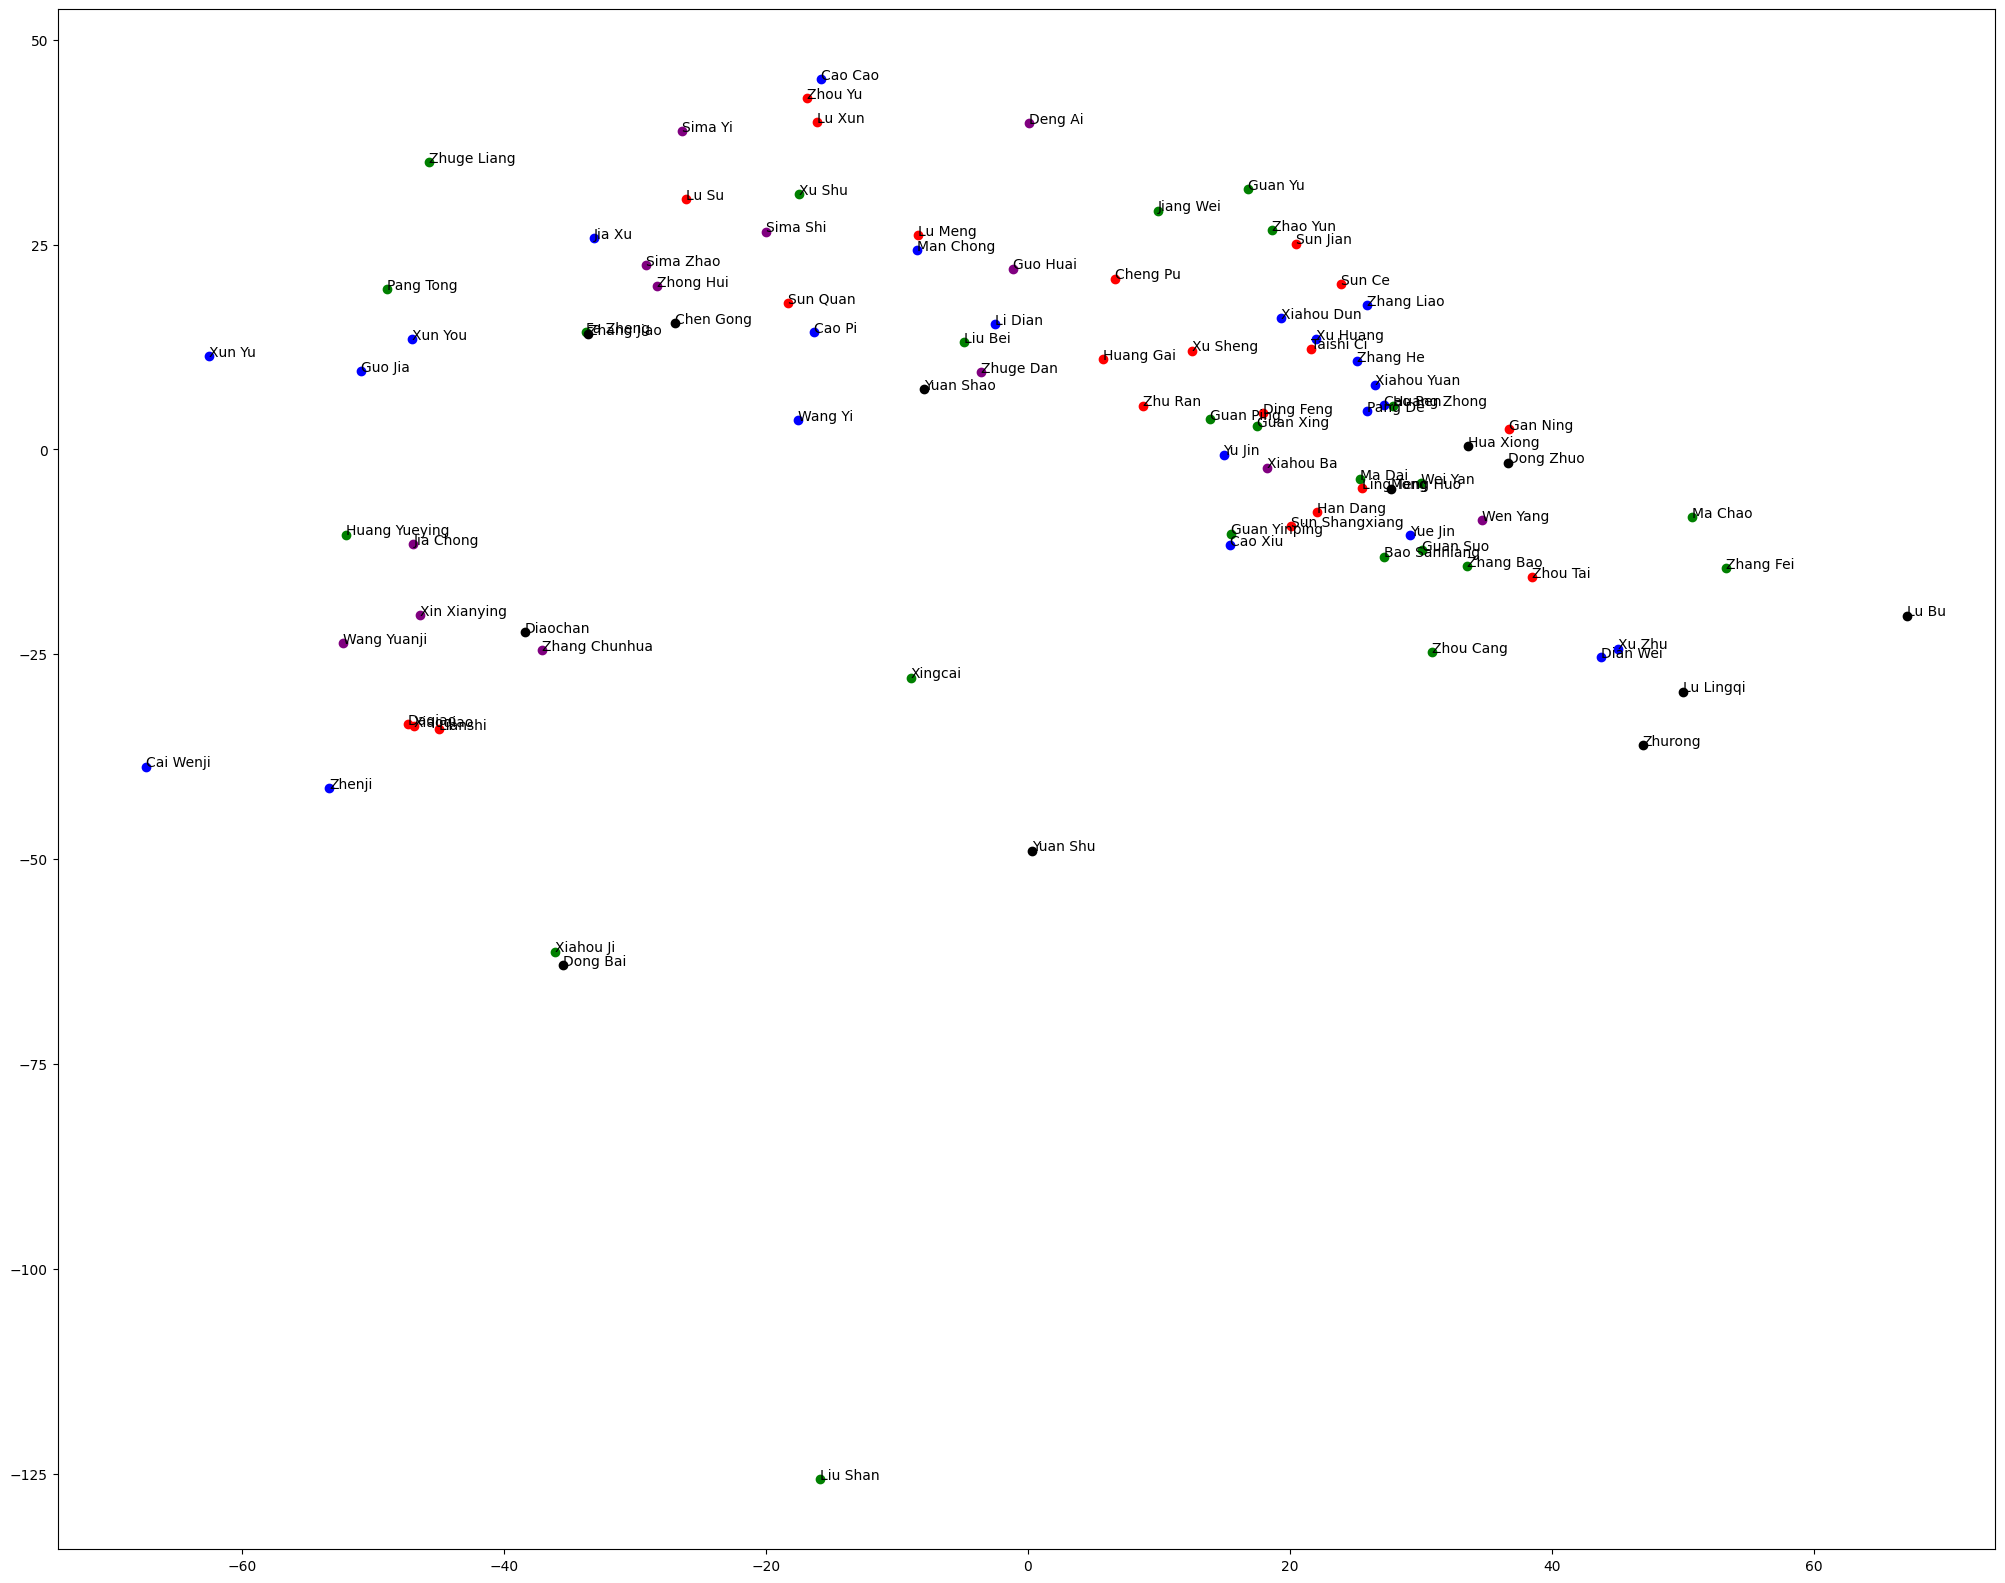

In [44]:
from matplotlib import pyplot as plt

plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Shu"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Shu"]["PCA_1"], c="green")
plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Wu"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Wu"]["PCA_1"], c="red")
plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Wei"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Wei"]["PCA_1"], c="blue")
plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Jin"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Jin"]["PCA_1"], c="purple")
plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Other"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Other"]["PCA_1"], c="black")

for i in range(len(pd_3)):
    name = pd_3.iloc[i]["Name"]
    plt.annotate(name, (pd_3.loc[pd_3["Name"] == name]["PCA_0"], pd_3.loc[pd_3["Name"] == name]["PCA_1"]))

plt.show()

In [45]:
# Check if there are null/na values to deal with
sw_filename = "samurai_warriors_characters.csv"

sw_pd_dataset = pd.read_csv(sw_filename)
print("General Data Check:")
print(sw_pd_dataset.head())
print("Number of Rows:", len(sw_pd_dataset))

General Data Check:
                Name  Gender  Death Age  Year of Death  LEA  VAL  INT  POL
0   Akechi Mitsuhide    Male         54           1582   96   84   93   97
1  Asakura Yoshikage    Male         40           1573   41   34   42   51
2  Ashikaga Yoshiaki    Male         60           1597   28   37   78   68
3      Azai Nagamasa    Male         28           1573   84   83   76   53
4             Chacha  Female         82           1615   55   28   77   83
Number of Rows: 72


In [46]:
# Hypothesis. Bucketing by Year of Death gets roughly equal data sizes.
# Believe years to bucket by are: 
# Neginning - 1582 (Death of Oda Nobunaga)
# 1583 - 1600 (Battle of Sekigahara)
# Alternate is 1615 (Siege of Osaka) or 1609 (Invasion of Ryukyu)
# 1601 - end

print("Dead on/before 1582:", len(sw_pd_dataset[sw_pd_dataset["Year of Death"] <= 1582]))
print("Dead on/after 1583 and on/before 1600:", len(sw_pd_dataset.loc[(sw_pd_dataset["Year of Death"] >= 1583) & (sw_pd_dataset["Year of Death"] <= 1609)]))
print("Dead on/after 1583 and on/before 1600:", len(sw_pd_dataset.loc[(sw_pd_dataset["Year of Death"] >= 1610)]))

Dead on/before 1582: 21
Dead on/after 1583 and on/before 1600: 23
Dead on/after 1583 and on/before 1600: 28


In [47]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

sw_pd_dataset_stats_only = sw_pd_dataset[["LEA", "VAL", "INT", "POL"]]

n_comp = 2
pca = PCA(n_components=n_comp)
sw_pd_pca = pca.fit_transform(sw_pd_dataset_stats_only)

# Approximate explained variance ratio    
print(f"PCA with {n_comp} components variance:", pca.explained_variance_ratio_.sum())        

# Compute pairwise distances before and after projection
sw_orig_dist = euclidean_distances(sw_pd_dataset_stats_only)
sw_proj_dist = euclidean_distances(sw_pd_pca)

# Compare distance matrices
sw_correlation = np.corrcoef(sw_orig_dist.ravel(), sw_proj_dist.ravel())[0, 1]
print(f"Correlation between original and projected distances: {sw_correlation:.8f}")

sw_pd_pca = pd.DataFrame(sw_pd_pca, columns=list(['PCA_0', 'PCA_1']))
print(sw_pd_pca.head())

PCA with 2 components variance: 0.8809727645843225
Correlation between original and projected distances: 0.98217022
       PCA_0      PCA_1
0  39.819900  -5.797126
1 -57.357247 -32.380536
2 -37.290740 -40.892549
3  -2.417262  15.842394
4 -15.287675 -50.775618


In [52]:
sw_pd_3 = pd.concat((sw_pd_dataset[["Name", "Death Age", "Year of Death"]], sw_pd_pca), axis=1)

print(sw_pd_3.head())

                Name  Death Age  Year of Death      PCA_0      PCA_1
0   Akechi Mitsuhide         54           1582  39.819900  -5.797126
1  Asakura Yoshikage         40           1573 -57.357247 -32.380536
2  Ashikaga Yoshiaki         60           1597 -37.290740 -40.892549
3      Azai Nagamasa         28           1573  -2.417262  15.842394
4             Chacha         82           1615 -15.287675 -50.775618


/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/home/ontos/Documents/ml_hobby/rotk_clustering/env/lib64/python3.13/site-packages/matplotlib/text.py:763: FutureWarning: Calling float on a 

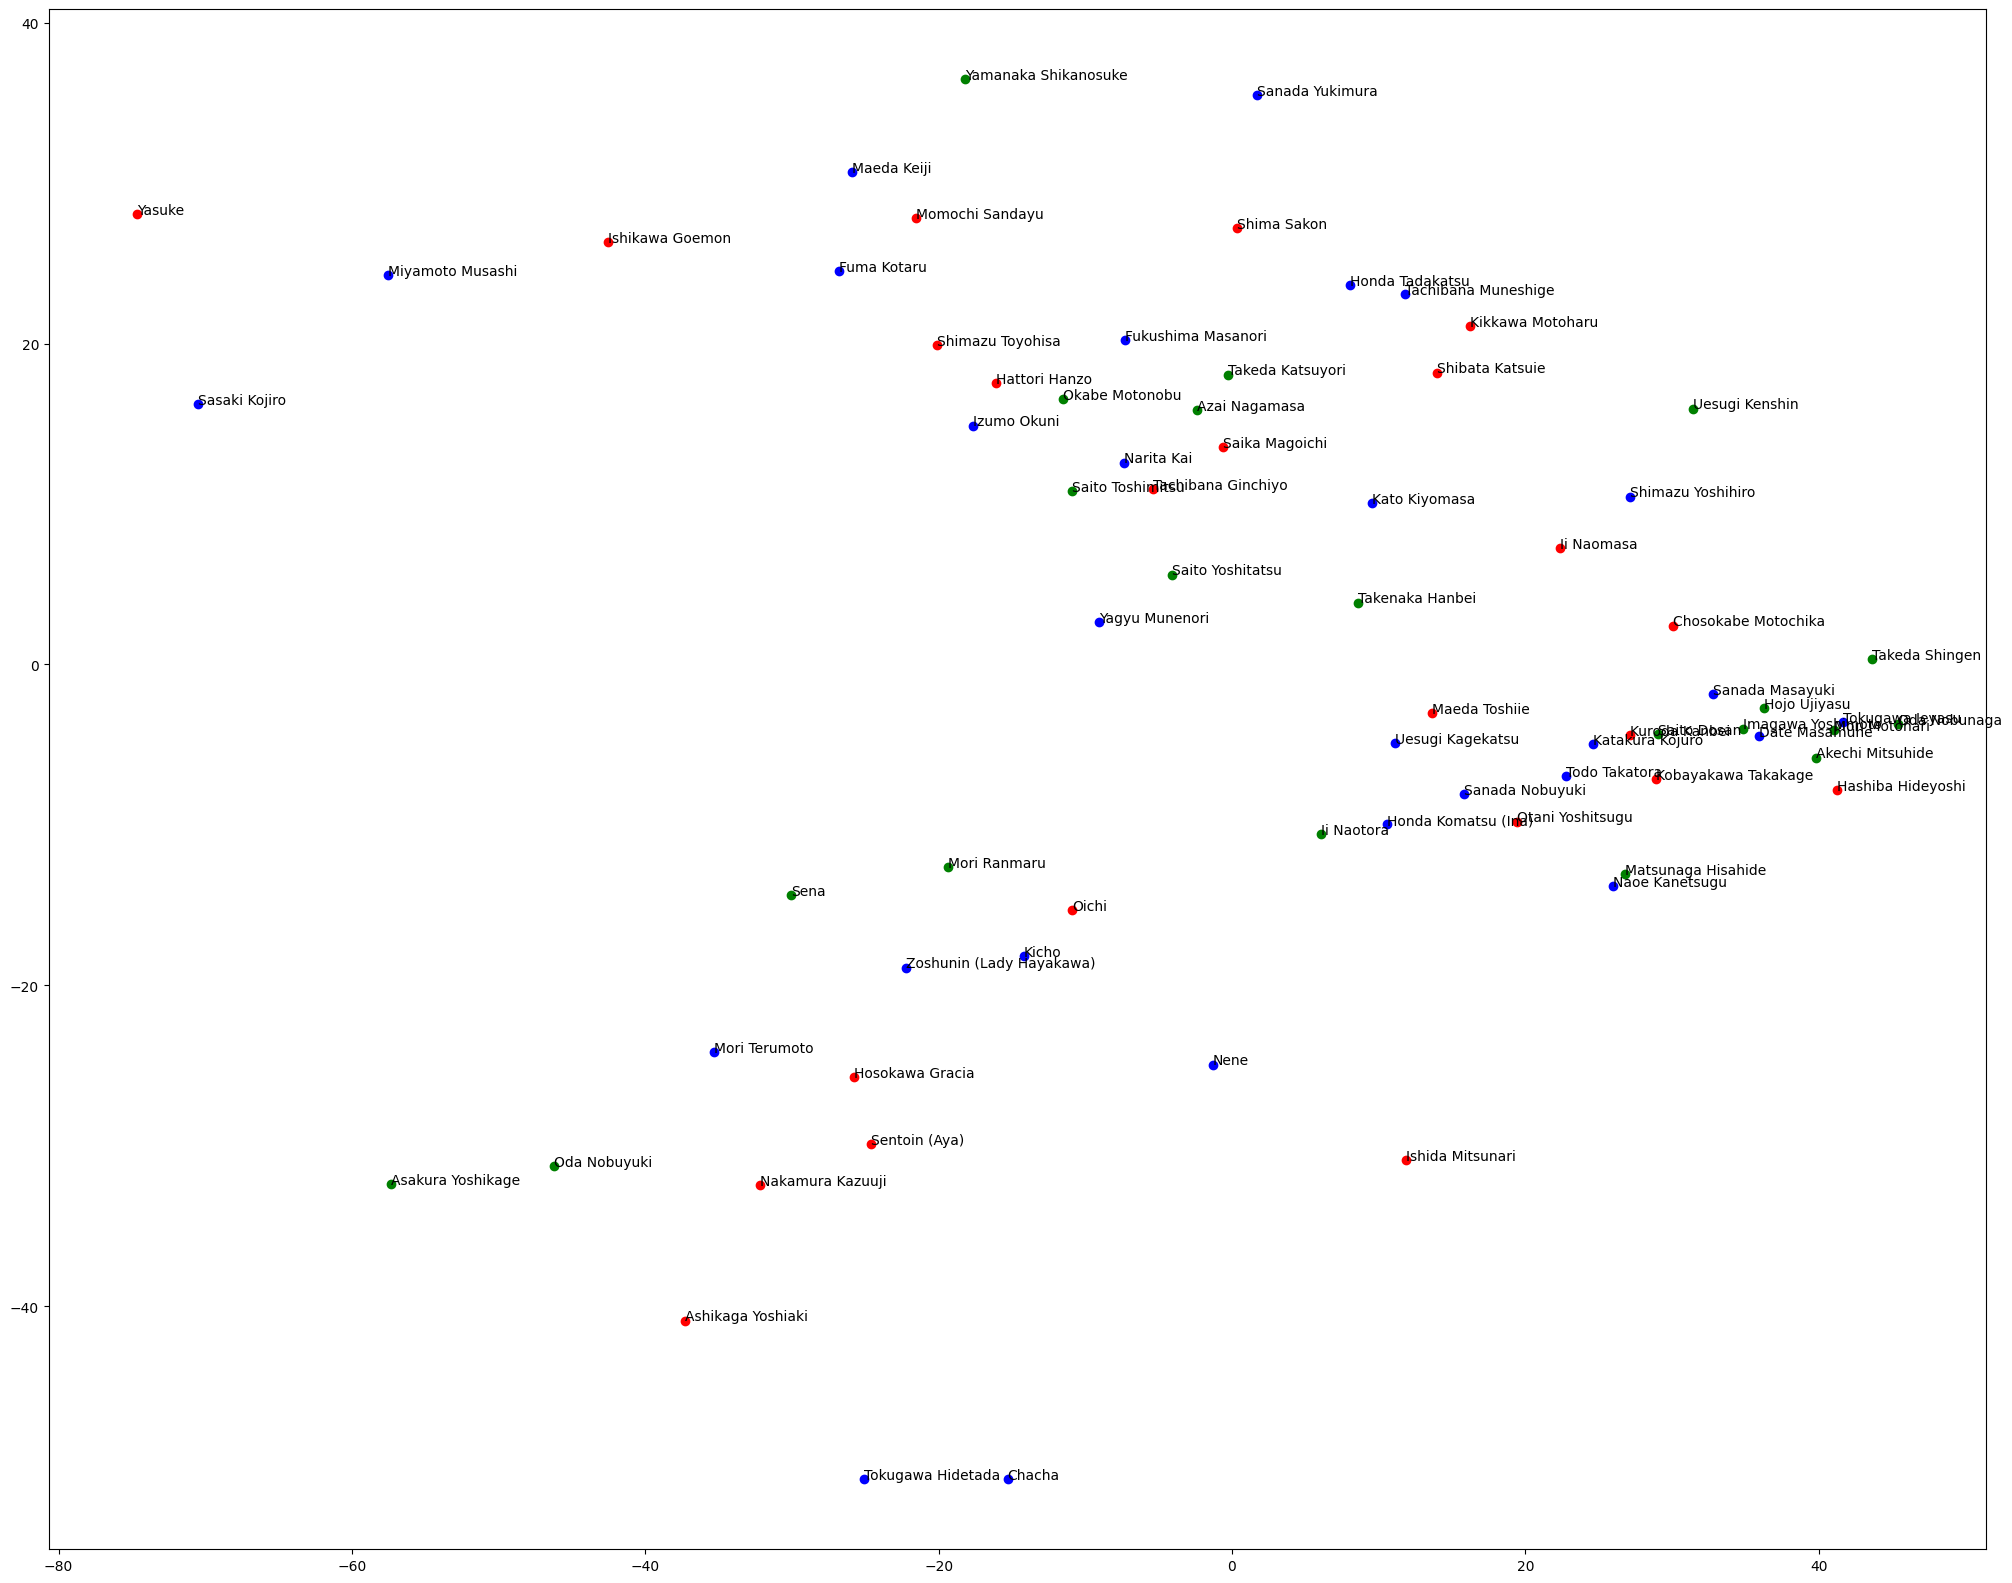

In [53]:
from matplotlib import pyplot as plt

plt.scatter(sw_pd_3.loc[sw_pd_3["Year of Death"] <= 1582]["PCA_0"], sw_pd_3[sw_pd_3["Year of Death"] <= 1582]["PCA_1"], c="green")
plt.scatter(sw_pd_3.loc[(sw_pd_3["Year of Death"] >= 1583) & (sw_pd_3["Year of Death"] <= 1609)]["PCA_0"], sw_pd_3.loc[(sw_pd_3["Year of Death"] >= 1583) & (sw_pd_3["Year of Death"] <= 1609)]["PCA_1"], c="red")
plt.scatter(sw_pd_3.loc[(sw_pd_3["Year of Death"] >= 1610)]["PCA_0"], sw_pd_3.loc[(sw_pd_3["Year of Death"] >= 1610)]["PCA_1"], c="blue")

for i in range(len(sw_pd_3)):
    name = sw_pd_3.iloc[i]["Name"]
    plt.annotate(name, (sw_pd_3.loc[sw_pd_3["Name"] == name]["PCA_0"], sw_pd_3.loc[sw_pd_3["Name"] == name]["PCA_1"]))

plt.show()

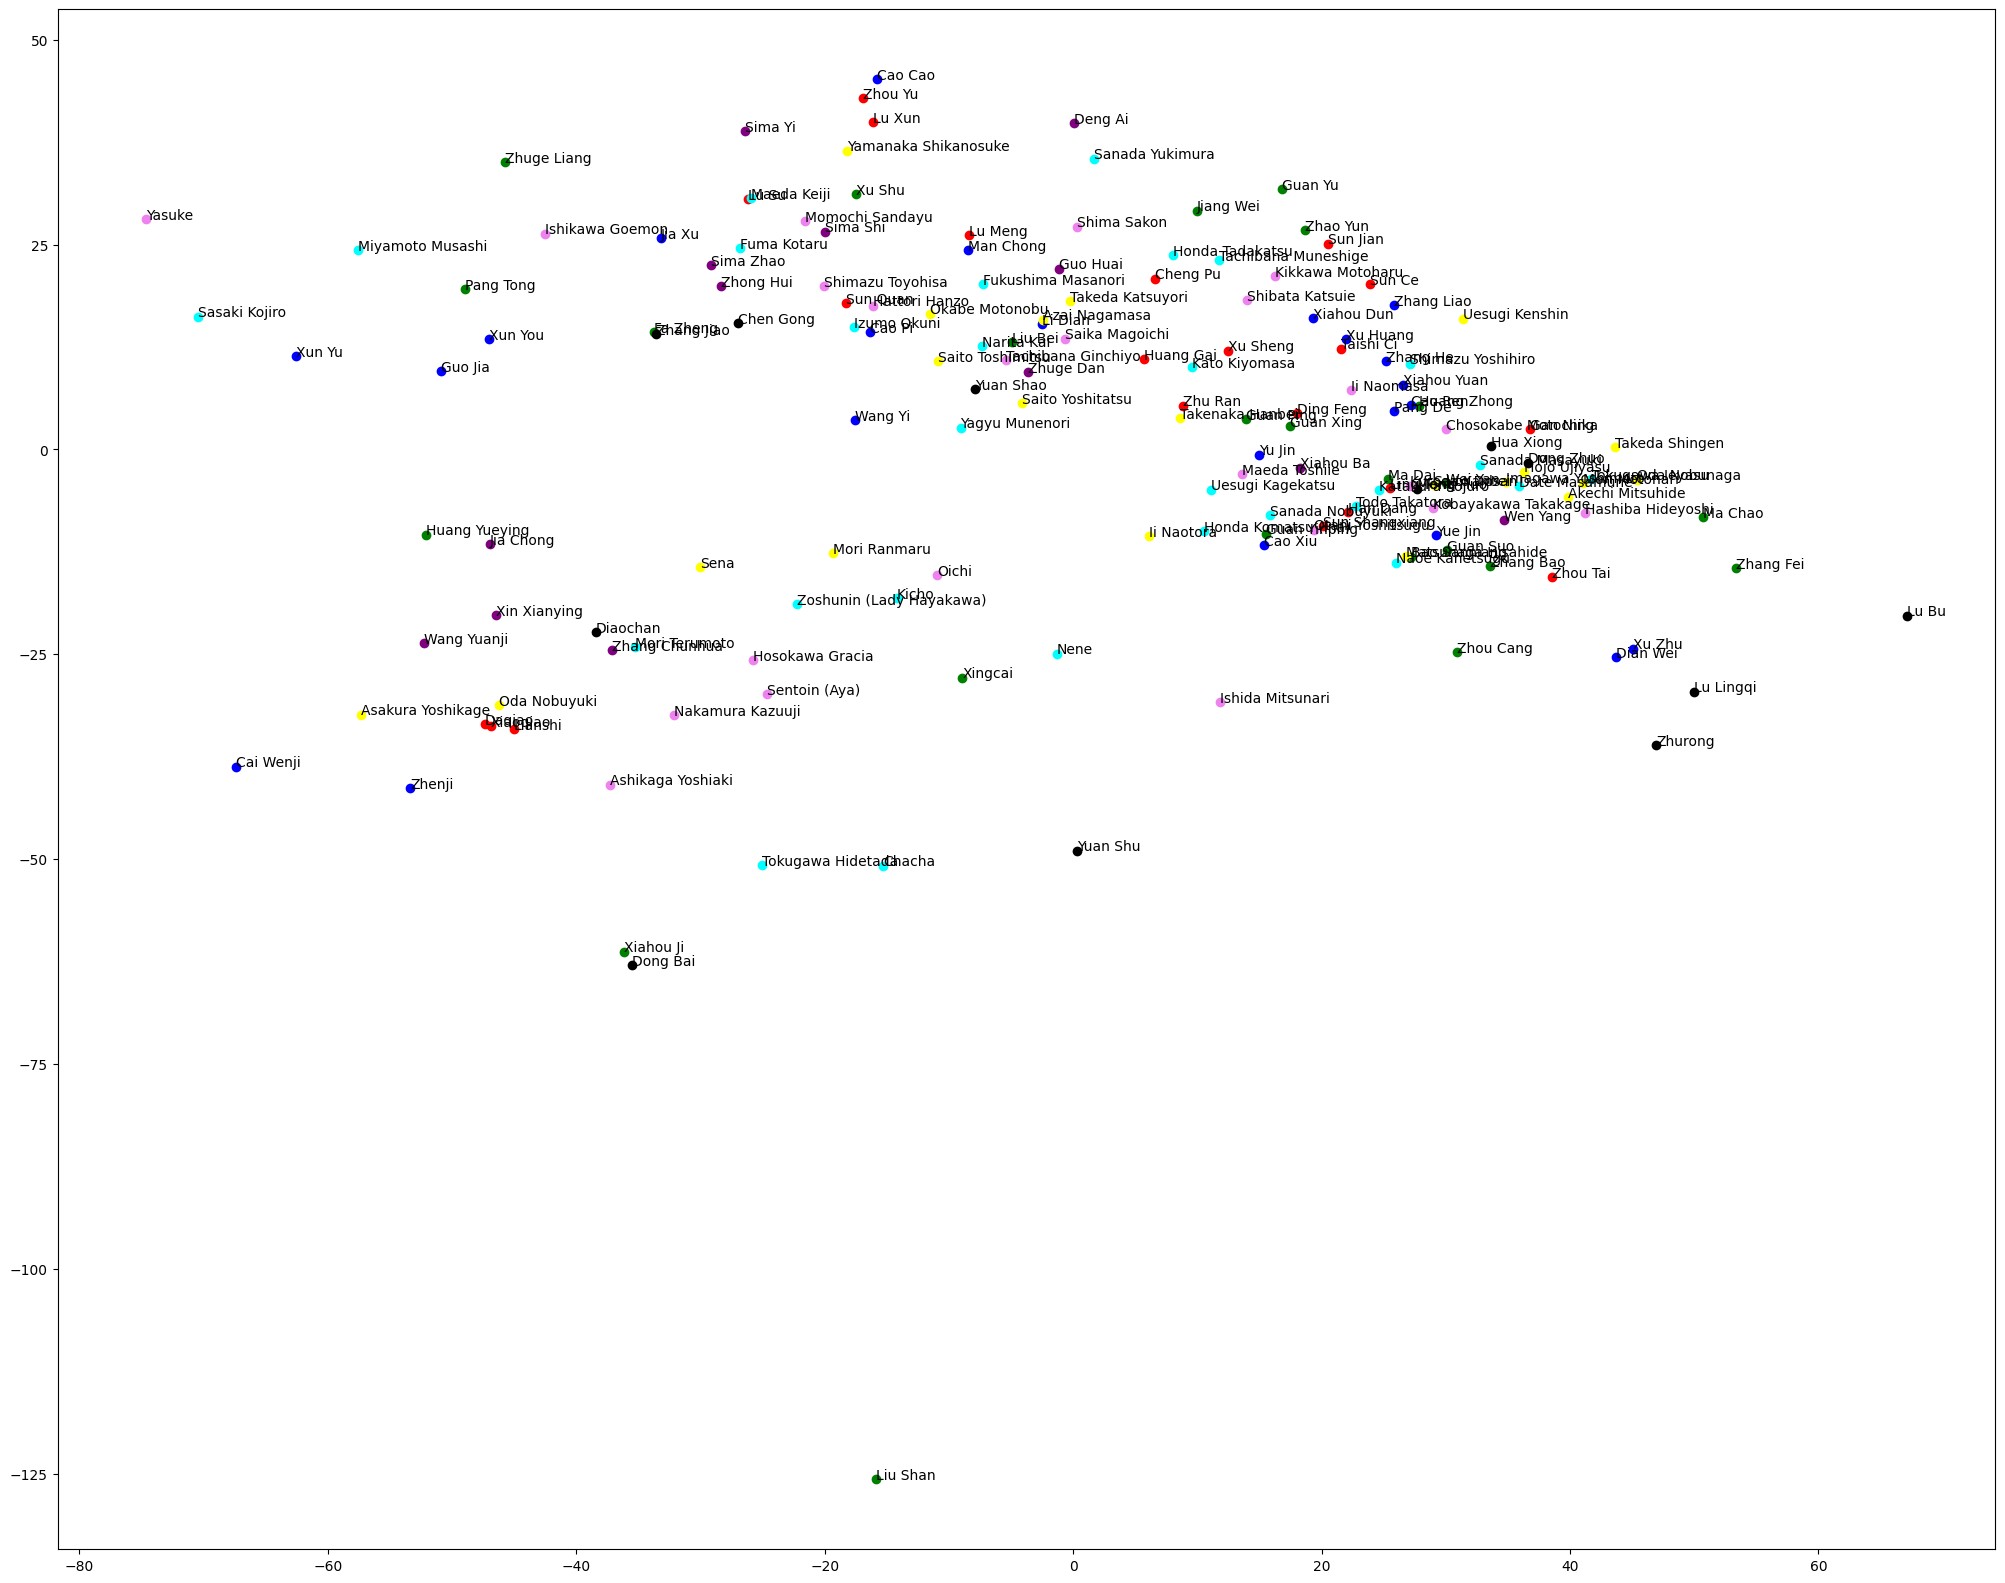

In [54]:
plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Shu"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Shu"]["PCA_1"], c="green")
plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Wu"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Wu"]["PCA_1"], c="red")
plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Wei"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Wei"]["PCA_1"], c="blue")
plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Jin"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Jin"]["PCA_1"], c="purple")
plt.scatter(pd_3.loc[pd_3["Kingdom"] == "Other"]["PCA_0"], pd_3[pd_3["Kingdom"] == "Other"]["PCA_1"], c="black")

for i in range(len(pd_3)):
    name = pd_3.iloc[i]["Name"]
    plt.annotate(name, (pd_3.loc[pd_3["Name"] == name]["PCA_0"], pd_3.loc[pd_3["Name"] == name]["PCA_1"]))

plt.scatter(sw_pd_3.loc[sw_pd_3["Year of Death"] <= 1582]["PCA_0"], sw_pd_3[sw_pd_3["Year of Death"] <= 1582]["PCA_1"], c="yellow")
plt.scatter(sw_pd_3.loc[(sw_pd_3["Year of Death"] >= 1583) & (sw_pd_3["Year of Death"] <= 1609)]["PCA_0"], sw_pd_3.loc[(sw_pd_3["Year of Death"] >= 1583) & (sw_pd_3["Year of Death"] <= 1609)]["PCA_1"], c="violet")
plt.scatter(sw_pd_3.loc[(sw_pd_3["Year of Death"] >= 1610)]["PCA_0"], sw_pd_3.loc[(sw_pd_3["Year of Death"] >= 1610)]["PCA_1"], c="cyan")

for i in range(len(sw_pd_3)):
    name = sw_pd_3.iloc[i]["Name"]
    plt.annotate(name, (sw_pd_3.loc[sw_pd_3["Name"] == name]["PCA_0"], sw_pd_3.loc[sw_pd_3["Name"] == name]["PCA_1"]))

plt.show()